# This notebook will help create a visualization of english wikipedia user traffic

### There are three major steps:

### 1. Retrieve Pagecount Data using the API and store this output in JSON files
### 2. Merge all data and store this as a CSV file
### 3. Generate and save the visualization

# 1. Retrieve Pagecount Data

### Set up the API calls

API code borrowed from http://paws-public.wmflabs.org/paws-public/User:Jtmorgan/data512_a1_example.ipynb

In [1]:
import json
import requests

In [2]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [3]:
# SAMPLE parameters for getting aggregated legacy view data 
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                # for end use 1st day of month following final month of data
                 "end" : "2016070100"
                    }

params_legacy_mobile = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                # for end use 1st day of month following final month of data
                 "end" : "2016070100"
                    }

params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2020100100'
                        }

params_pageviews_mobile_app = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2020100100'
                        }

params_pageviews_mobile_web = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2020100100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/jfm888',
    'From': 'jm888@uw.edu'
}

In [4]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

### Run the API calls

In [5]:
monthly_legacy = api_call(endpoint_legacy, params_legacy)

In [6]:
monthly_legacy_mobile = api_call(endpoint_legacy, params_legacy_mobile)

In [7]:
monthly_pageviews = api_call(endpoint_pageviews, params_pageviews)

In [8]:
monthly_pageviews_mobile_app = api_call(endpoint_pageviews, params_pageviews_mobile_app)

In [9]:
monthly_pageviews_mobile_web = api_call(endpoint_pageviews, params_pageviews_mobile_web)

### Explore the API data to see if it makes sense

For brevity I've only shown the first and last entry in each API call

In [10]:
print(monthly_legacy['items'][0])
print(monthly_legacy['items'][-1])

{'project': 'en.wikipedia', 'access-site': 'desktop-site', 'granularity': 'monthly', 'timestamp': '2007120100', 'count': 2998331524}
{'project': 'en.wikipedia', 'access-site': 'desktop-site', 'granularity': 'monthly', 'timestamp': '2016060100', 'count': 4975092447}


In [11]:
print(monthly_legacy_mobile['items'][0])
print(monthly_legacy_mobile['items'][-1])

{'project': 'en.wikipedia', 'access-site': 'mobile-site', 'granularity': 'monthly', 'timestamp': '2014100100', 'count': 3091546685}
{'project': 'en.wikipedia', 'access-site': 'mobile-site', 'granularity': 'monthly', 'timestamp': '2016060100', 'count': 3372618063}


In [12]:
print(monthly_pageviews['items'][0])
print(monthly_pageviews['items'][-1])

{'project': 'en.wikipedia', 'access': 'desktop', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2015070100', 'views': 4376666686}
{'project': 'en.wikipedia', 'access': 'desktop', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2020090100', 'views': 2661783500}


In [13]:
print(monthly_pageviews_mobile_app['items'][0])
print(monthly_pageviews_mobile_app['items'][-1])

{'project': 'en.wikipedia', 'access': 'mobile-app', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2015070100', 'views': 109624146}
{'project': 'en.wikipedia', 'access': 'mobile-app', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2020090100', 'views': 147202116}


In [14]:
print(monthly_pageviews_mobile_web['items'][0])
print(monthly_pageviews_mobile_web['items'][-1])

{'project': 'en.wikipedia', 'access': 'mobile-web', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2015070100', 'views': 3179131148}
{'project': 'en.wikipedia', 'access': 'mobile-web', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2020090100', 'views': 4345048664}


### Save the API call data in JSON files

We will save the API call data in JSON files as a backup

Format for the saved files is "apiname_accesstype_firstmonth-lastmonth.json"

In [15]:
with open("pagecounts_desktop-site_200712-201608.json", "w") as outfile: 
    json.dump(monthly_legacy, outfile)

In [16]:
with open("pagecounts_mobile-site_201410-201608.json", "w") as outfile: 
    json.dump(monthly_legacy_mobile, outfile) 

In [17]:
with open("pageviews_desktop_201507-202009.json", "w") as outfile: 
    json.dump(monthly_pageviews, outfile)

In [18]:
with open("pageviews_mobile-app_201507-202009.json", "w") as outfile: 
    json.dump(monthly_pageviews_mobile_app, outfile)

In [19]:
with open("pageviews_mobile-web_201507-202009.json", "w") as outfile: 
    json.dump(monthly_pageviews_mobile_web, outfile)

# 2. Merge all API data

### Create Pandas DataFrame objects for each API call

In [20]:
import pandas as pd

In [21]:
df_pagecount_desktop = pd.DataFrame(monthly_legacy['items']).sort_values(by=['timestamp'])

In [22]:
df_pagecount_desktop.head()

,project,access-site,granularity,timestamp,count
0,en.wikipedia,desktop-site,monthly,2007120100,2998331524
1,en.wikipedia,desktop-site,monthly,2008010100,4930902570
2,en.wikipedia,desktop-site,monthly,2008020100,4818393763
3,en.wikipedia,desktop-site,monthly,2008030100,4955405809
4,en.wikipedia,desktop-site,monthly,2008040100,5159162183


In [23]:
df_pagecount_mobile = pd.DataFrame(monthly_legacy_mobile['items']).sort_values(by=['timestamp'])

In [24]:
df_pagecount_mobile.head()

,project,access-site,granularity,timestamp,count
0,en.wikipedia,mobile-site,monthly,2014100100,3091546685
1,en.wikipedia,mobile-site,monthly,2014110100,3027489668
2,en.wikipedia,mobile-site,monthly,2014120100,3278950021
3,en.wikipedia,mobile-site,monthly,2015010100,3485302091
4,en.wikipedia,mobile-site,monthly,2015020100,3091534479


In [25]:
df_pageviews_desktop = pd.DataFrame(monthly_pageviews['items']).sort_values(by=['timestamp'])

In [26]:
df_pageviews_desktop.head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,user,monthly,2015070100,4376666686
1,en.wikipedia,desktop,user,monthly,2015080100,4332482183
2,en.wikipedia,desktop,user,monthly,2015090100,4485491704
3,en.wikipedia,desktop,user,monthly,2015100100,4477532755
4,en.wikipedia,desktop,user,monthly,2015110100,4287720220


In [27]:
df_pageviews_mobile_app = pd.DataFrame(monthly_pageviews_mobile_app['items']).sort_values(by=['timestamp'])

In [28]:
df_pageviews_mobile_app.head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-app,user,monthly,2015070100,109624146
1,en.wikipedia,mobile-app,user,monthly,2015080100,109669149
2,en.wikipedia,mobile-app,user,monthly,2015090100,96221684
3,en.wikipedia,mobile-app,user,monthly,2015100100,94523777
4,en.wikipedia,mobile-app,user,monthly,2015110100,94353925


In [29]:
df_pageviews_mobile_web = pd.DataFrame(monthly_pageviews_mobile_web['items']).sort_values(by=['timestamp'])

In [30]:
df_pageviews_mobile_web.head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-web,user,monthly,2015070100,3179131148
1,en.wikipedia,mobile-web,user,monthly,2015080100,3192663889
2,en.wikipedia,mobile-web,user,monthly,2015090100,3073981649
3,en.wikipedia,mobile-web,user,monthly,2015100100,3173975355
4,en.wikipedia,mobile-web,user,monthly,2015110100,3142247145


### Inital formatting of the dataframes

We want to change the views column to reflect type of view either desktop or mobile and date column to be two columns: year, and month. We will drop the other columns.


In [31]:
df_pagecount_desktop.head()

,project,access-site,granularity,timestamp,count
0,en.wikipedia,desktop-site,monthly,2007120100,2998331524
1,en.wikipedia,desktop-site,monthly,2008010100,4930902570
2,en.wikipedia,desktop-site,monthly,2008020100,4818393763
3,en.wikipedia,desktop-site,monthly,2008030100,4955405809
4,en.wikipedia,desktop-site,monthly,2008040100,5159162183


from pagecount dataframes drop 'project', 'access-site', and 'granularity' columns

In [32]:
df_pagecount_desktop = df_pagecount_desktop.drop(['project', 'access-site', 'granularity'], axis=1)
df_pagecount_mobile = df_pagecount_mobile.drop(['project', 'access-site', 'granularity'], axis=1)

In [33]:
df_pageviews_desktop.head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,user,monthly,2015070100,4376666686
1,en.wikipedia,desktop,user,monthly,2015080100,4332482183
2,en.wikipedia,desktop,user,monthly,2015090100,4485491704
3,en.wikipedia,desktop,user,monthly,2015100100,4477532755
4,en.wikipedia,desktop,user,monthly,2015110100,4287720220


filter pageview dataframes so that the only agents are users

In [34]:
only_user_desktop = df_pageviews_desktop['agent']=='user'
df_pageviews_desktop = df_pageviews_desktop[only_user_desktop]

only_user_mobile_app = df_pageviews_mobile_app['agent']=='user'
df_pageviews_mobile_app = df_pageviews_mobile_app[only_user_mobile_app]

only_user_mobile_web = df_pageviews_mobile_web['agent']=='user'
df_pageviews_mobile_web = df_pageviews_mobile_web[only_user_mobile_web]

from pageview dataframes drop 'project', 'access', 'agent', and 'granularity' columns

In [35]:
df_pageviews_desktop = df_pageviews_desktop.drop(['project', 'access', 'agent','granularity'], axis=1)
df_pageviews_mobile_app = df_pageviews_mobile_app.drop(['project', 'access', 'agent','granularity'], axis=1)
df_pageviews_mobile_web = df_pageviews_mobile_web.drop(['project', 'access', 'agent','granularity'], axis=1)

rename views

In [36]:
df_pagecount_desktop = df_pagecount_desktop.rename(columns={'timestamp':'timestamp', 'count':'pagecount_desktop_views'
                                                           })
df_pagecount_mobile = df_pagecount_mobile.rename(columns={'timestamp':'timestamp', 'count':'pagecount_mobile_views'
                                                           })

In [37]:
df_pageviews_desktop = df_pageviews_desktop.rename(columns={'timestamp':'timestamp', 'views':'pageview_desktop_views'
                                                           })
df_pageviews_mobile_app = df_pageviews_mobile_app.rename(columns={'timestamp':'timestamp', 'views':'pageview_mobile_views'
                                                           })
df_pageviews_mobile_web = df_pageviews_mobile_web.rename(columns={'timestamp':'timestamp', 'views':'pageview_mobile_views'
                                                           })


In [38]:
print(df_pagecount_desktop.head())
print(df_pagecount_mobile.head())

    timestamp  pagecount_desktop_views
0  2007120100               2998331524
1  2008010100               4930902570
2  2008020100               4818393763
3  2008030100               4955405809
4  2008040100               5159162183
    timestamp  pagecount_mobile_views
0  2014100100              3091546685
1  2014110100              3027489668
2  2014120100              3278950021
3  2015010100              3485302091
4  2015020100              3091534479


In [39]:
print(df_pageviews_desktop.head())
print(df_pageviews_mobile_app.head())
print(df_pageviews_mobile_web.head())

    timestamp  pageview_desktop_views
0  2015070100              4376666686
1  2015080100              4332482183
2  2015090100              4485491704
3  2015100100              4477532755
4  2015110100              4287720220
    timestamp  pageview_mobile_views
0  2015070100              109624146
1  2015080100              109669149
2  2015090100               96221684
3  2015100100               94523777
4  2015110100               94353925
    timestamp  pageview_mobile_views
0  2015070100             3179131148
1  2015080100             3192663889
2  2015090100             3073981649
3  2015100100             3173975355
4  2015110100             3142247145


### merge pagecount dataframes

need to use a left join as desktop date range is wider than mobile date range

In [40]:
df_pagecounts = df_pagecount_desktop.merge(df_pagecount_mobile, how='left', left_on='timestamp', right_on='timestamp')

In [41]:
df_pagecounts = df_pagecounts.fillna(0)

In [42]:
df_pagecounts.head()

,timestamp,pagecount_desktop_views,pagecount_mobile_views
0,2007120100,2998331524,0.0
1,2008010100,4930902570,0.0
2,2008020100,4818393763,0.0
3,2008030100,4955405809,0.0
4,2008040100,5159162183,0.0


In [43]:
df_pagecounts.tail()

,timestamp,pagecount_desktop_views,pagecount_mobile_views
98,2016020100,5347709361,3.333231e+09
99,2016030100,5407676056,3.419854e+09
100,2016040100,5572235399,3.301385e+09
101,2016050100,5330532334,3.418436e+09
102,2016060100,4975092447,3.372618e+09


In [44]:
df_pagecounts['pagecount_all_views'] = df_pagecounts.sum(axis=1)

In [45]:
df_pagecounts.head()

,timestamp,pagecount_desktop_views,pagecount_mobile_views,pagecount_all_views
0,2007120100,2998331524,0.0,2.998332e+09
1,2008010100,4930902570,0.0,4.930903e+09
2,2008020100,4818393763,0.0,4.818394e+09
3,2008030100,4955405809,0.0,4.955406e+09
4,2008040100,5159162183,0.0,5.159162e+09


### merge pageview dataframes

pageview api data all covers same date range so we dont need a left join and can use a merge or inner join

In [46]:
df_pageviews_all_mobile = df_pageviews_mobile_app.merge(df_pageviews_mobile_web, left_on='timestamp', right_on='timestamp')

In [47]:
df_pageviews_all_mobile.head()

,timestamp,pageview_mobile_views_x,pageview_mobile_views_y
0,2015070100,109624146,3179131148
1,2015080100,109669149,3192663889
2,2015090100,96221684,3073981649
3,2015100100,94523777,3173975355
4,2015110100,94353925,3142247145


In [48]:
df_pageviews_all_mobile['pageview_mobile_views'] = df_pageviews_all_mobile.sum(axis=1)

In [49]:
df_pageviews_all_mobile = df_pageviews_all_mobile.drop(['pageview_mobile_views_x', 'pageview_mobile_views_y'], axis=1)

In [50]:
df_pageviews_all_mobile.head()

,timestamp,pageview_mobile_views
0,2015070100,3288755294
1,2015080100,3302333038
2,2015090100,3170203333
3,2015100100,3268499132
4,2015110100,3236601070


In [51]:
df_pageviews = df_pageviews_all_mobile.merge(df_pageviews_desktop, left_on='timestamp', right_on='timestamp')

In [52]:
df_pageviews.head()

,timestamp,pageview_mobile_views,pageview_desktop_views
0,2015070100,3288755294,4376666686
1,2015080100,3302333038,4332482183
2,2015090100,3170203333,4485491704
3,2015100100,3268499132,4477532755
4,2015110100,3236601070,4287720220


In [53]:
df_pageviews['pageview_all_views'] = df_pageviews.sum(axis=1)

In [54]:
df_pageviews.head()

,timestamp,pageview_mobile_views,pageview_desktop_views,pageview_all_views
0,2015070100,3288755294,4376666686,7665421980
1,2015080100,3302333038,4332482183,7634815221
2,2015090100,3170203333,4485491704,7655695037
3,2015100100,3268499132,4477532755,7746031887
4,2015110100,3236601070,4287720220,7524321290


### merge pageview and pagecount data frames

These dataframes cover different time ranges so we need an outer join

In [55]:
df_traffic = df_pagecounts.merge(df_pageviews, how='outer')

In [56]:
df_traffic = df_traffic.fillna(0)

In [57]:
df_traffic.head()

,timestamp,pagecount_desktop_views,pagecount_mobile_views,pagecount_all_views,pageview_mobile_views,pageview_desktop_views,pageview_all_views
0,2007120100,2.998332e+09,0.0,2.998332e+09,0.0,0.0,0.0
1,2008010100,4.930903e+09,0.0,4.930903e+09,0.0,0.0,0.0
2,2008020100,4.818394e+09,0.0,4.818394e+09,0.0,0.0,0.0
3,2008030100,4.955406e+09,0.0,4.955406e+09,0.0,0.0,0.0
4,2008040100,5.159162e+09,0.0,5.159162e+09,0.0,0.0,0.0


change timestamp to datetime object so we can easily extract year and month data

In [58]:
df_traffic['timestamp'] = pd.to_datetime(df_traffic['timestamp'], format='%Y%m%d%H')

In [59]:
df_traffic['year'] = pd.DatetimeIndex(df_traffic['timestamp']).year

In [60]:
df_traffic['month'] = pd.DatetimeIndex(df_traffic['timestamp']).month

save this dataframe for latter as it will make visualization easier if we have a datatime col

In [61]:
df_traffic_timestamp = df_traffic #save for latter as it will make visualization easier if we have a datatime col

In [62]:
df_traffic = df_traffic.drop(['timestamp'], axis=1)

In [63]:
df_traffic = df_traffic.astype('int64')

to make zero padded months

In [64]:
df_traffic["month"] = df_traffic['month'].map("{:02}".format)

inspect the dataframe

In [65]:
df_traffic

,pagecount_desktop_views,pagecount_mobile_views,pagecount_all_views,pageview_mobile_views,pageview_desktop_views,pageview_all_views,year,month
0,2998331524,0,2998331524,0,0,0,2007,12
1,4930902570,0,4930902570,0,0,0,2008,01
2,4818393763,0,4818393763,0,0,0,2008,02
3,4955405809,0,4955405809,0,0,0,2008,03
4,5159162183,0,5159162183,0,0,0,2008,04
...,...,...,...,...,...,...,...,...
149,0,0,0,5231700095,3078093615,8309793710,2020,05
150,0,0,0,4573975256,2721328557,7295303813,2020,06
151,0,0,0,4809714465,2638936132,7448650597,2020,07
152,0,0,0,4803308661,2613058239,7416366900,2020,08


In [66]:
df_traffic.dtypes

pagecount_desktop_views     int64
pagecount_mobile_views      int64
pagecount_all_views         int64
pageview_mobile_views       int64
pageview_desktop_views      int64
pageview_all_views          int64
year                        int64
month                      object
dtype: object

### Create CSV file from our combined dataframe

In [67]:
df_traffic.to_csv(r'en-wikipedia_traffic_200712-202009.csv', index = False)

# Generate and save the visualization

In [68]:
import matplotlib.pyplot as plt
import numpy as np

make values smaller to increase legibility of visualization

In [69]:
df_traffic_timestamp[['pagecount_desktop_views', 'pagecount_mobile_views',
       'pagecount_all_views', 'pageview_mobile_views',
       'pageview_desktop_views', 'pageview_all_views']] = df_traffic_timestamp[['pagecount_desktop_views', 'pagecount_mobile_views',
       'pagecount_all_views', 'pageview_mobile_views',
       'pageview_desktop_views', 'pageview_all_views']].div(1000000)

convert data types to integers

In [70]:
df_traffic_timestamp = df_traffic_timestamp.astype({'pagecount_desktop_views':'int64', 'pagecount_mobile_views':'int64',
       'pagecount_all_views':'int64', 'pageview_mobile_views':'int64',
       'pageview_desktop_views':'int64', 'pageview_all_views':'int64'})

remove zero values to clean up visualization

In [71]:
drop_rows = df_traffic_timestamp['pagecount_desktop_views']!=0
df_traffic_timestamp_pagecount_desktop = df_traffic_timestamp[drop_rows]
df_traffic_timestamp_pagecount_desktop.head()

,timestamp,pagecount_desktop_views,pagecount_mobile_views,pagecount_all_views,pageview_mobile_views,pageview_desktop_views,pageview_all_views,year,month
0,2007-12-01,2998,0,2998,0,0,0,2007,12
1,2008-01-01,4930,0,4930,0,0,0,2008,1
2,2008-02-01,4818,0,4818,0,0,0,2008,2
3,2008-03-01,4955,0,4955,0,0,0,2008,3
4,2008-04-01,5159,0,5159,0,0,0,2008,4


remove zero values to clean up visualization

In [72]:
drop_rows = df_traffic_timestamp['pagecount_mobile_views']!=0
df_traffic_timestamp_pagecount_mobile = df_traffic_timestamp[drop_rows]
df_traffic_timestamp_pagecount_mobile.head()

,timestamp,pagecount_desktop_views,pagecount_mobile_views,pagecount_all_views,pageview_mobile_views,pageview_desktop_views,pageview_all_views,year,month
82,2014-10-01,6577,3091,9669,0,0,0,2014,10
83,2014-11-01,6153,3027,9181,0,0,0,2014,11
84,2014-12-01,5830,3278,9109,0,0,0,2014,12
85,2015-01-01,6103,3485,9589,0,0,0,2015,1
86,2015-02-01,5602,3091,8694,0,0,0,2015,2


remove zero values to clean up visualization

In [73]:
drop_rows = df_traffic_timestamp['pagecount_all_views']!=0
df_traffic_timestamp_pagecount_all = df_traffic_timestamp[drop_rows]
df_traffic_timestamp_pagecount_all.head()

,timestamp,pagecount_desktop_views,pagecount_mobile_views,pagecount_all_views,pageview_mobile_views,pageview_desktop_views,pageview_all_views,year,month
0,2007-12-01,2998,0,2998,0,0,0,2007,12
1,2008-01-01,4930,0,4930,0,0,0,2008,1
2,2008-02-01,4818,0,4818,0,0,0,2008,2
3,2008-03-01,4955,0,4955,0,0,0,2008,3
4,2008-04-01,5159,0,5159,0,0,0,2008,4


remove zero values to clean up visualization

In [74]:
drop_rows = df_traffic_timestamp['pageview_all_views']!=0
df_traffic_timestamp_pageview_all = df_traffic_timestamp[drop_rows]
df_traffic_timestamp_pageview_all.head()

,timestamp,pagecount_desktop_views,pagecount_mobile_views,pagecount_all_views,pageview_mobile_views,pageview_desktop_views,pageview_all_views,year,month
91,2015-07-01,5229,3254,8483,3288,4376,7665,2015,7
92,2015-08-01,5035,3268,8304,3302,4332,7634,2015,8
93,2015-09-01,5409,3172,8582,3170,4485,7655,2015,9
94,2015-10-01,5535,3246,8781,3268,4477,7746,2015,10
95,2015-11-01,5296,3218,8515,3236,4287,7524,2015,11


remove zero values to clean up visualization

In [75]:
drop_rows = df_traffic_timestamp['pageview_mobile_views']!=0
df_traffic_timestamp_pageview_mobile = df_traffic_timestamp[drop_rows]
df_traffic_timestamp_pageview_mobile.head()

,timestamp,pagecount_desktop_views,pagecount_mobile_views,pagecount_all_views,pageview_mobile_views,pageview_desktop_views,pageview_all_views,year,month
91,2015-07-01,5229,3254,8483,3288,4376,7665,2015,7
92,2015-08-01,5035,3268,8304,3302,4332,7634,2015,8
93,2015-09-01,5409,3172,8582,3170,4485,7655,2015,9
94,2015-10-01,5535,3246,8781,3268,4477,7746,2015,10
95,2015-11-01,5296,3218,8515,3236,4287,7524,2015,11


remove zero values to clean up visualization

In [76]:
drop_rows = df_traffic_timestamp['pageview_desktop_views']!=0
df_traffic_timestamp_pageview_desktop = df_traffic_timestamp[drop_rows]
df_traffic_timestamp_pageview_desktop.head()

,timestamp,pagecount_desktop_views,pagecount_mobile_views,pagecount_all_views,pageview_mobile_views,pageview_desktop_views,pageview_all_views,year,month
91,2015-07-01,5229,3254,8483,3288,4376,7665,2015,7
92,2015-08-01,5035,3268,8304,3302,4332,7634,2015,8
93,2015-09-01,5409,3172,8582,3170,4485,7655,2015,9
94,2015-10-01,5535,3246,8781,3268,4477,7746,2015,10
95,2015-11-01,5296,3218,8515,3236,4287,7524,2015,11


Plot and save the visulaization

/Users/Jack/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


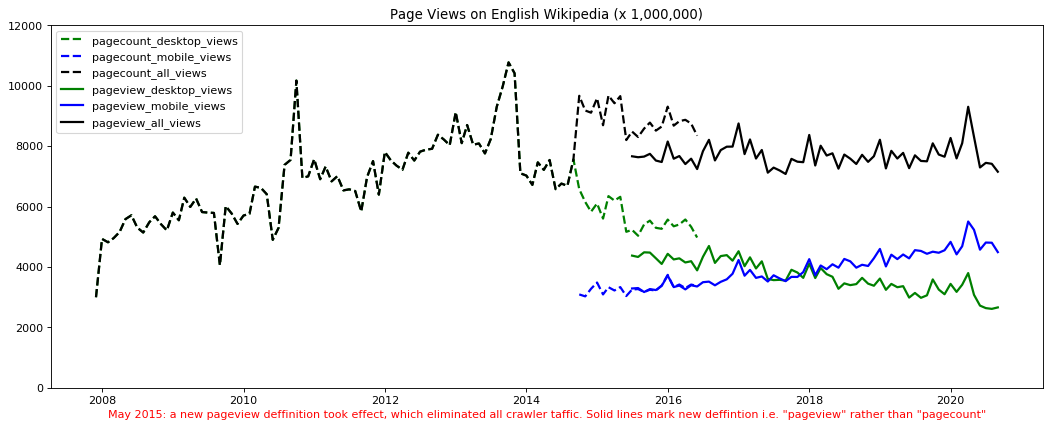

In [77]:
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot( 'timestamp', 'pagecount_desktop_views', data=df_traffic_timestamp_pagecount_desktop, marker='', color='g', linewidth=2, linestyle='--')
plt.plot( 'timestamp', 'pagecount_mobile_views', data=df_traffic_timestamp_pagecount_mobile, marker='', color='b', linewidth=2, linestyle='--')
plt.plot( 'timestamp', 'pagecount_all_views', data=df_traffic_timestamp_pagecount_all, marker='', color='k', linewidth=2, linestyle='--')
plt.plot( 'timestamp', 'pageview_desktop_views', data=df_traffic_timestamp_pageview_desktop, marker='', color='g', linewidth=2, linestyle='-')
plt.plot( 'timestamp', 'pageview_mobile_views', data=df_traffic_timestamp_pageview_mobile, marker='', color='b', linewidth=2, linestyle='-')
plt.plot( 'timestamp', 'pageview_all_views', data=df_traffic_timestamp_pageview_all, marker='', color='k', linewidth=2, linestyle='-')
plt.yticks(np.arange(0, 13000, 2000))
plt.xlabel('May 2015: a new pageview deffinition took effect, which eliminated all crawler taffic. Solid lines mark new deffintion i.e. "pageview" rather than "pagecount"', color='red')  
plt.title("Page Views on English Wikipedia (x 1,000,000)")
plt.legend()

plt.savefig('data512_a1_viz.png')

## Congrats, we have created the visualization!